In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

<IPython.core.display.Javascript object>


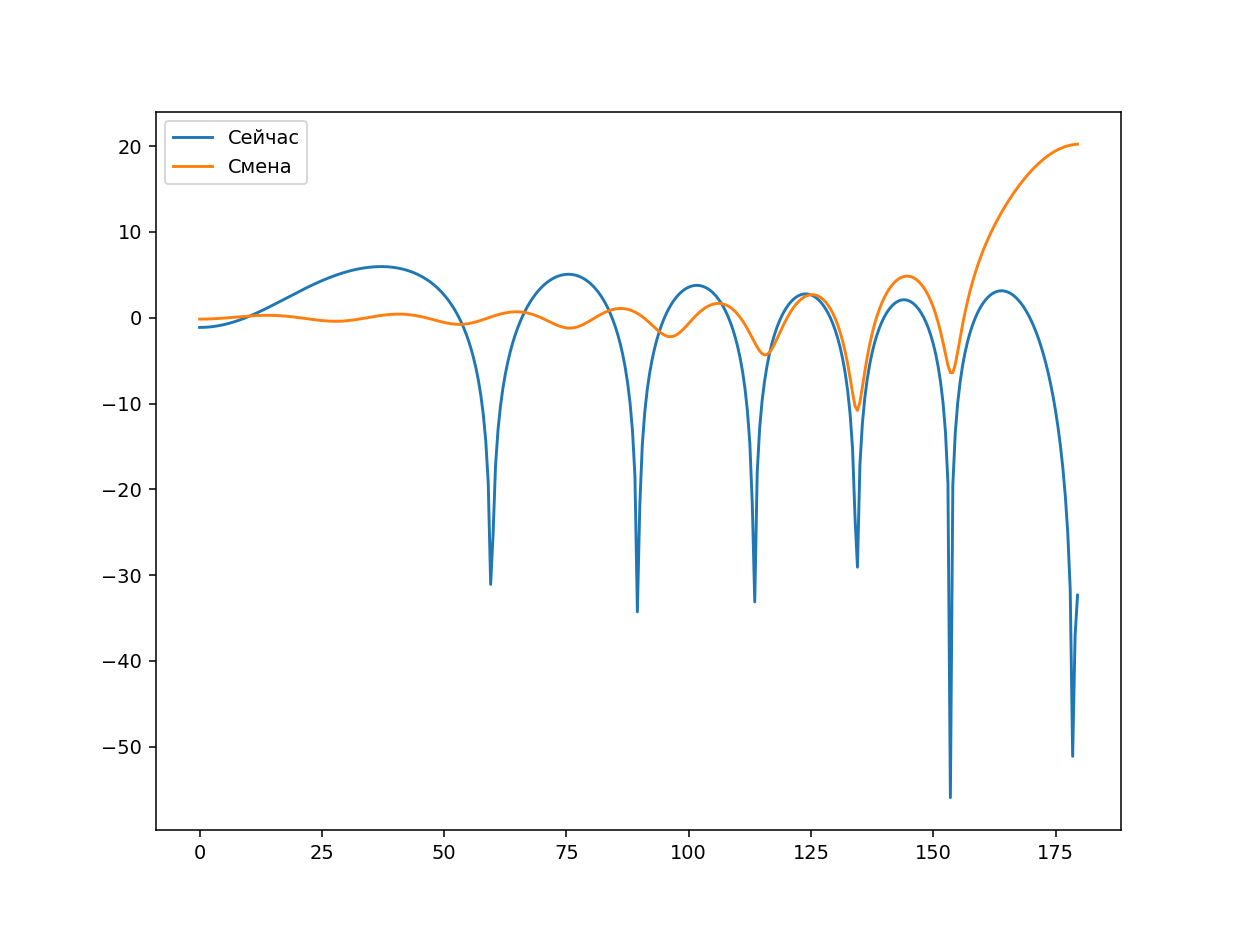

In [2]:
%matplotlib notebook

data = np.loadtxt("../logs/sigma.txt")
xE = data[0]
yE = data[1]
sigmaE = 10 * np.log10(yE / np.pi)
plt.plot(xE, sigmaE, label = 'Сейчас')


data = np.loadtxt("../logs/1026/sigma.txt")
x = data[0]
y = data[1]
sigma = 10 * np.log10(y / np.pi)
plt.plot(x, sigma, label="Смена")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


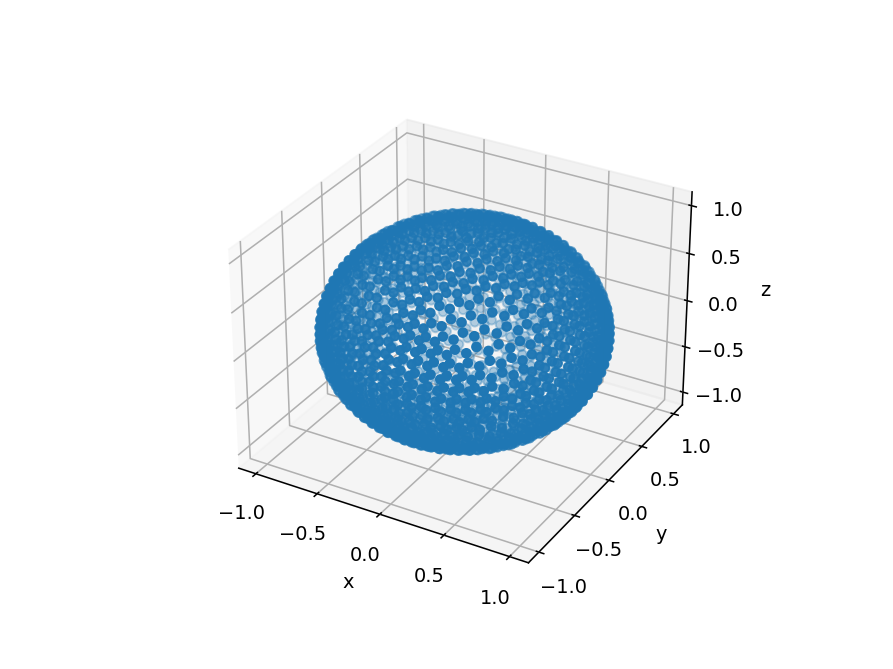

In [27]:
points = np.loadtxt("../logs/points.txt")
real_field = np.loadtxt("../logs/greal.txt")
im_field = np.loadtxt("../logs/gimag.txt")

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

ur = real_field[:, 0]
vr = real_field[:, 1]
wr = real_field[:, 2]

ui = im_field[:, 0]
vi = im_field[:, 1]
wi = im_field[:, 2]

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter(x, y, z)

<IPython.core.display.Javascript object>


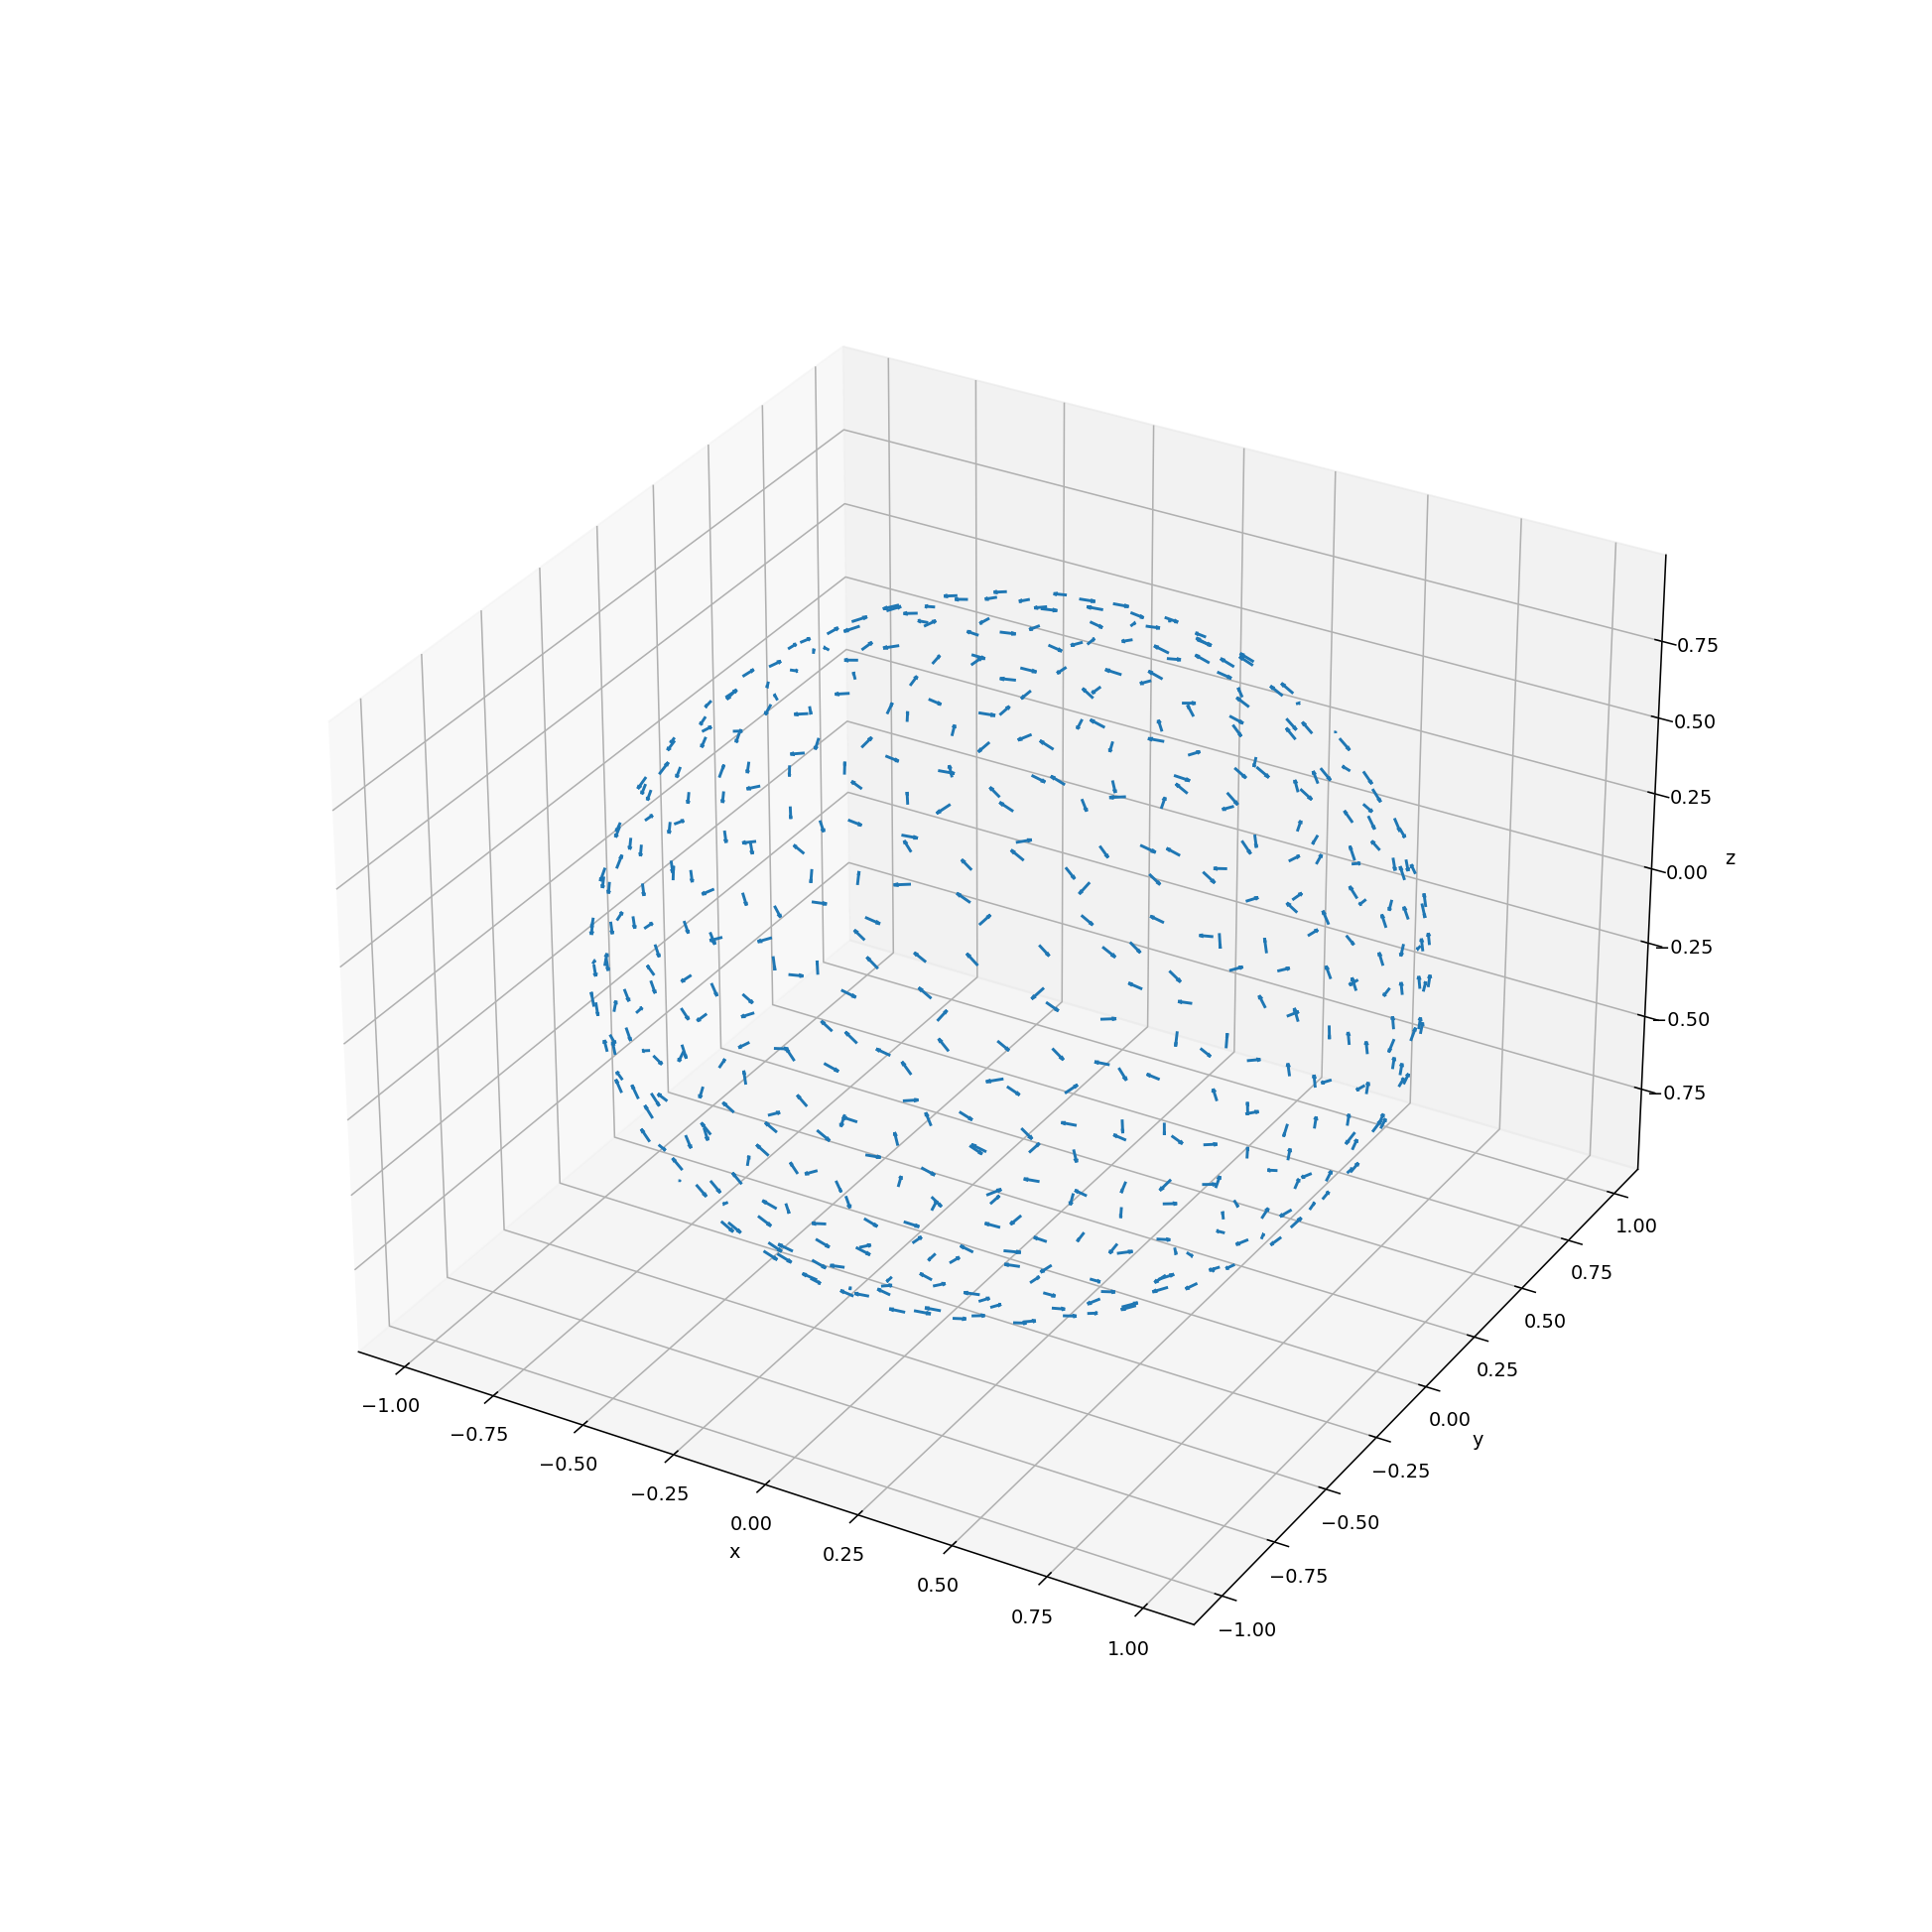

/tmp/ipykernel_3527/2772644497.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [4]:
%matplotlib notebook

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.quiver(x, y, z, ur, vr, wr, length=0.04, normalize=True)

plt.show()

<IPython.core.display.Javascript object>


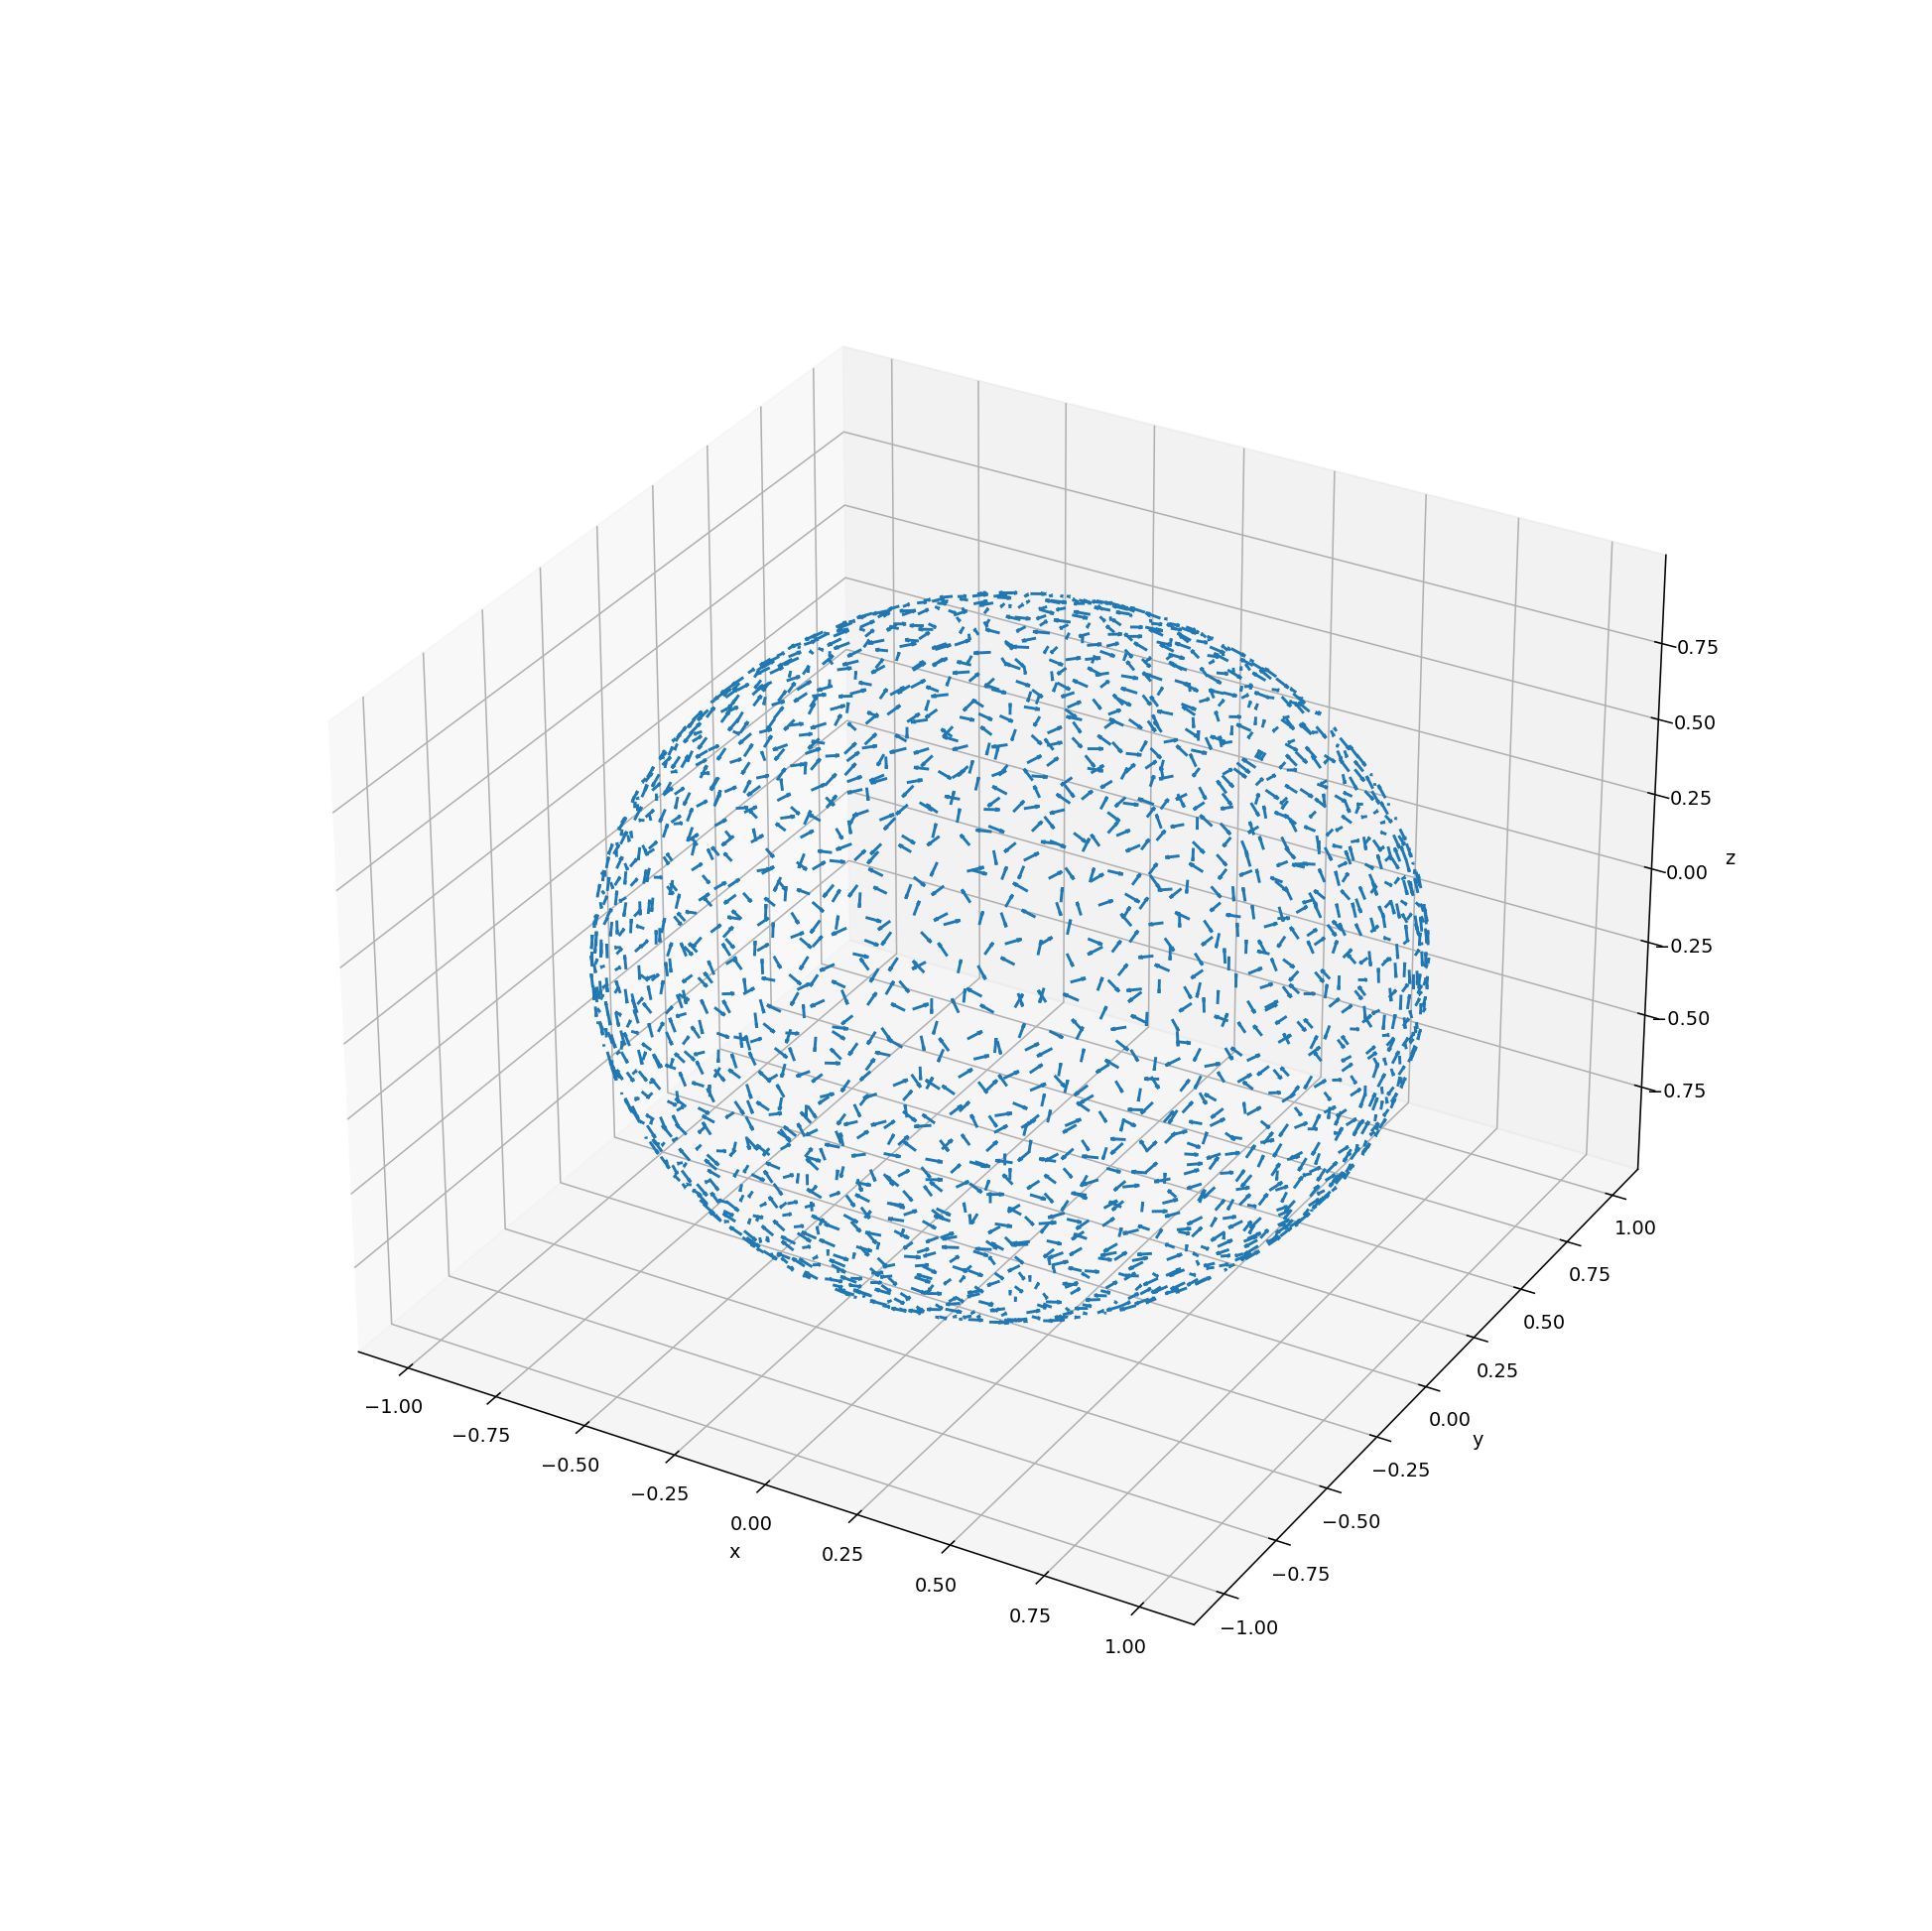

/tmp/ipykernel_3527/3547494536.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [71]:
points = np.loadtxt("../logs/points.txt")
real_field = np.loadtxt("../logs/greal.txt")
im_field = np.loadtxt("../logs/gimag.txt")

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

ur = real_field[:, 0]
vr = real_field[:, 1]
wr = real_field[:, 2]

ui = im_field[:, 0]
vi = im_field[:, 1]
wi = im_field[:, 2]

%matplotlib notebook

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.quiver(x, y, z, ur, vr, wr, length=0.04, normalize=True)

plt.show()

<IPython.core.display.Javascript object>


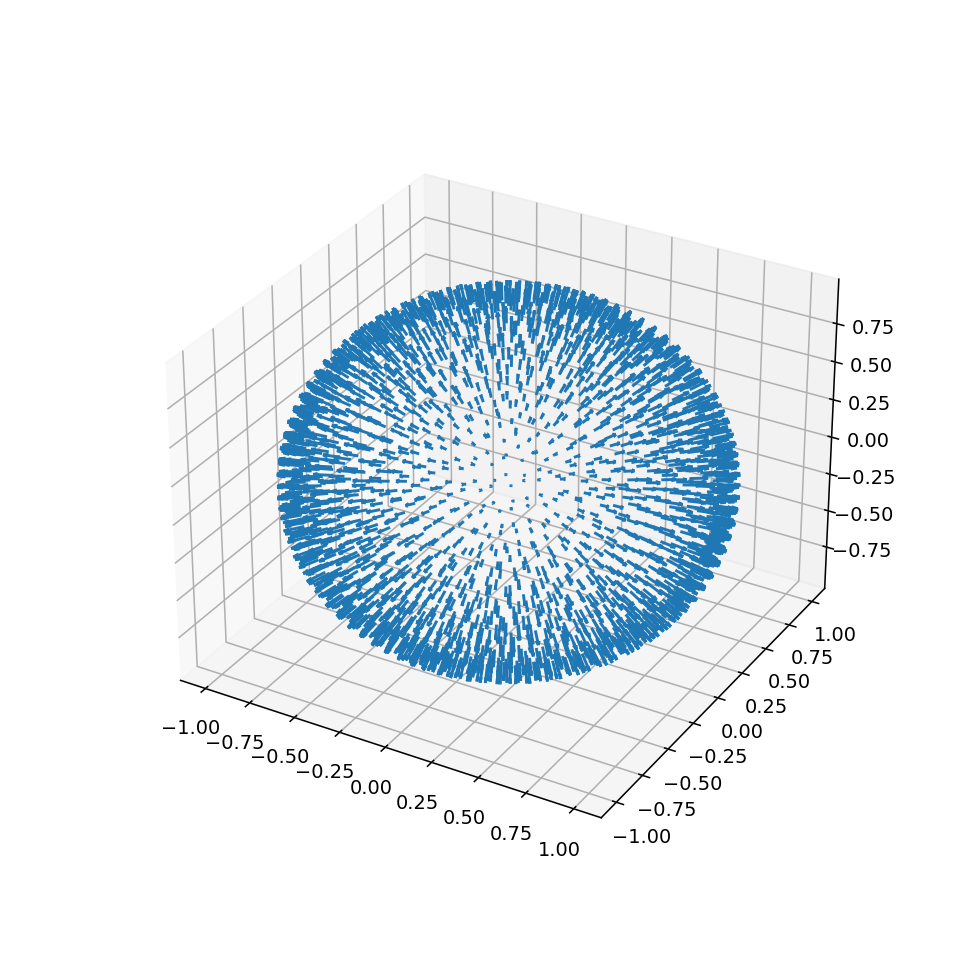

/tmp/ipykernel_3527/2180567659.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [72]:
norm_field = np.loadtxt("../logs/norms.txt")
norm_x = norm_field[:, 0]
norm_y = norm_field[:, 1]
norm_z = norm_field[:, 2]

fig = plt.figure(figsize=(5, 5))
ax = fig.gca(projection='3d')


ax.quiver(x, y, z, norm_x, norm_y, norm_z, length=0.1, normalize=True)
plt.show()

In [94]:
k = 10
Eplr = np.array([0,1,0])
v = np.array([-1, 0, 0])

def Einc(point):
    return Eplr * np.exp(1j * k * np.dot(v, point))

In [140]:
points = np.loadtxt("../logs/points.txt")
real_field = np.loadtxt("../logs/greal.txt")
im_field = np.loadtxt("../logs/gimag.txt")

j1 = real_field + 1j * im_field

j1[0]

array([ 0.041977-0.02516j , -0.852445+0.517964j, -0.002072-0.005795j])

In [139]:
points = np.loadtxt("../logs/points.txt")
real_field = np.loadtxt("../logs/greal.txt")
im_field = np.loadtxt("../logs/gimag.txt")

j = real_field + 1j * im_field

j[0]

array([ 0.041673-0.025667j, -0.568311+0.342944j, -0.280017+0.179556j])

In [141]:
np.dot(j[0], j1[0])

(0.309545472424-0.58758079474j)

In [134]:
np.dot(j[0], norm_field[0])

(3.438599999981695e-07-3.3846800000063293e-07j)

In [135]:
Einc(points[0])

array([-0.        +0.j        , -0.85609935+0.51681128j,
       -0.        +0.j        ])

In [132]:
-np.cross(Eplr, norm_field[0]) * np.exp(1j * k * np.dot(v, points[0]))

array([ 0.041954  -0.02532685j,  0.        -0.j        ,
       -0.85404129+0.51556887j])

In [11]:
pair = re.compile('\(([^,\)]+),([^,\)]+)\)')

def parse_pair(s):
    a = complex(*map(float, pair.match(s).groups()))
    return a

In [16]:
m = []
with open("../logs/matrix.txt", 'r') as f:
    for line in f.readlines():
        a = line.split(" ")
        if len(a) > 10:
            temp = [parse_pair(c) for c in a[1:]]
            m += temp
n = 768

In [19]:
matrix = np.array(m).reshape(n, n)
matrix

array([[ 1.32378676+0.j, -0.32854466+0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [-0.32854466+0.j,  1.32378676+0.j,  0.32854466+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.32854466+0.j,  1.32378676+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       ...,
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         1.15590155+0.j,  0.03218061+0.j,  0.24294819+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.03218061+0.j,  0.73467666+0.j, -0.03218061+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.24294819+0.j, -0.03218061+0.j,  1.15590155+0.j]])

In [24]:
tempA = np.load("./dielectric_mag_j.npy")
tempA

array([[ 2.64757353+0.j, -0.65708933+0.j,  0.        +0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [-0.65708933+0.j,  2.64757353+0.j,  0.65708933+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.65708933+0.j,  2.64757353+0.j, ...,
         0.        +0.j,  0.        +0.j,  0.        +0.j],
       ...,
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         2.3118031 +0.j,  0.06436122+0.j,  0.48589639+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.06436122+0.j,  1.46935333+0.j, -0.06436122+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
         0.48589639+0.j, -0.06436122+0.j,  2.3118031 +0.j]])

In [26]:
np.allclose(2 * matrix, tempA)

True

In [13]:
f = []
i = 0
with open("./logs/f.txt", 'r') as file:
    for line in file.readlines():
        a = line.split(" ")
        i += 1
        if i > 2:
            temp = [parse_pair(c) for c in a[1:]]
            f += temp

In [14]:
f = np.array(f)
f.shape

(580,)

In [79]:
np.save("./jcomplex", j)